In [1]:
import mlrose_hiive as mlrose
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import random as rn
import os
import time
%matplotlib inline

In [2]:
"""
Setting up seed values for reproducability
"""
starting_seed = 1234
seed_values = []

for i in range(0, 5):
    seed_values.append(starting_seed + i)

# np.random.seed(seed)
# rn.seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

# First run

Trying the different algorithms on the optimization problem with differing problem sizes before messing with the hyperparameters and the different iterations amounts.

In [3]:
"""
Defining custom maximization fitness function for N-Queens
"""

def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # First condition is same row
            # Second condition is top right and bottom left diagonal
            # Third condition is top left and bottom right diagonal
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - 1)):
                fitness_cnt += 1
            
    return fitness_cnt

In [6]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparamters RHC
max_attempts_rhc = 100
max_iters_rhc = 1000
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100
max_iters_sa = 1000

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100
max_iters_ga = 1000

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
max_iters_mimic = 1000
noise = 0.1

problem_sizes = [1 * i for i in range(0, 32, 4)]
problem_sizes.pop(0)

rhc_data_problem_sizes = []
sa_data_problem_sizes = []
ga_data_problem_sizes = []
mimic_data_problem_sizes = []

# Want to loop across the different problem sizes
for problem_size in problem_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running problem size {problem_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.CustomFitness(queens_max)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = problem_size
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=max_iters_rhc,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=max_iters_sa,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=max_iters_ga,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=max_iters_mimic,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_problem_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_problem_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_problem_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_problem_sizes.append(mimic_avg)
    
    print("====================================================")


Running problem size 4!
RHC best avg fitness 5.0
SA best avg fitness 5.0
GA best avg fitness 5.0
MIMIC best avg fitness 5.0
Running problem size 8!
RHC best avg fitness 27.6
SA best avg fitness 27.8
GA best avg fitness 27.8
MIMIC best avg fitness 27.8
Running problem size 12!
RHC best avg fitness 65.6
SA best avg fitness 65.2
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running problem size 16!
RHC best avg fitness 119.4
SA best avg fitness 119.6
GA best avg fitness 119.8
MIMIC best avg fitness 115.8
Running problem size 20!
RHC best avg fitness 189.0
SA best avg fitness 189.0
GA best avg fitness 189.6
MIMIC best avg fitness 183.6
Running problem size 24!
RHC best avg fitness 274.4
SA best avg fitness 274.8
GA best avg fitness 275.2
MIMIC best avg fitness 268.0
Running problem size 28!
RHC best avg fitness 375.6
SA best avg fitness 376.2
GA best avg fitness 376.8
MIMIC best avg fitness 366.8


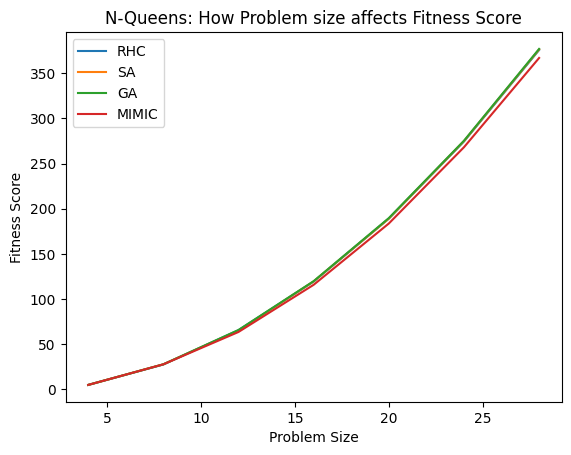

In [7]:
"""
Plotting the fitness score (Y axis) to problem size (X axis) for Four-Peaks
"""

plt.plot(problem_sizes, rhc_data_problem_sizes, label = 'RHC')
plt.plot(problem_sizes, sa_data_problem_sizes, label = 'SA')
plt.plot(problem_sizes, ga_data_problem_sizes, label = 'GA')
plt.plot(problem_sizes, mimic_data_problem_sizes, label = 'MIMIC')

plt.xlabel("Problem Size")
plt.ylabel("Fitness Score")
plt.title("N-Queens: How Problem size affects Fitness Score")
plt.legend()
plt.show()

# Now trying with different iteration sizes with a fixed problem size

It seems that the difference between the curves happen when the problem size reaches around 60 bits. For this iteration we will set the problem size to 60 and try out different iteration sizes to see how it changes the fitness score.

In [8]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 12

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)


rhc_data_iteration_sizes = []
sa_data_iteration_sizes = []
ga_data_iteration_sizes = []
mimic_data_iteration_sizes = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.CustomFitness(queens_max)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = problem_size
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_iteration_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_iteration_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_iteration_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_iteration_sizes.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC best avg fitness 64.2
SA best avg fitness 59.0
GA best avg fitness 65.2
MIMIC best avg fitness 63.4
Running iteration size 100!
RHC best avg fitness 65.0
SA best avg fitness 61.2
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 150!
RHC best avg fitness 65.2
SA best avg fitness 62.6
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 200!
RHC best avg fitness 65.6
SA best avg fitness 63.0
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 250!
RHC best avg fitness 65.8
SA best avg fitness 63.8
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 300!
RHC best avg fitness 65.6
SA best avg fitness 64.0
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 350!
RHC best avg fitness 65.6
SA best avg fitness 64.4
GA best avg fitness 65.8
MIMIC best avg fitness 63.6
Running iteration size 400!
RHC best avg fitness 65.6
SA best avg fitness 64.

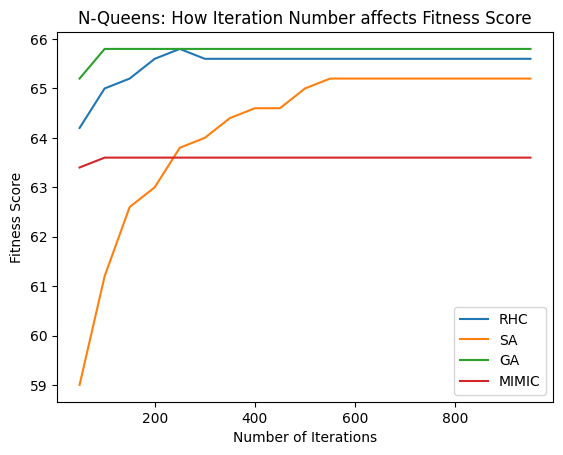

In [9]:
"""
Plotting the fitness score (Y axis) to iteration size (X axis) for N-Queens
"""

plt.plot(iteration_sizes, rhc_data_iteration_sizes, label = 'RHC')
plt.plot(iteration_sizes, sa_data_iteration_sizes, label = 'SA')
plt.plot(iteration_sizes, ga_data_iteration_sizes, label = 'GA')
plt.plot(iteration_sizes, mimic_data_iteration_sizes, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score")
plt.title("N-Queens: How Iteration Number affects Fitness Score")
plt.legend()
plt.show()

# Generating the Number of FEvals with respect to Iterations

In [10]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 12

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_fevals = []
sa_data_fevals = []
ga_data_fevals = []
mimic_data_fevals = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.CustomFitness(queens_max)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = problem_size
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_curve[-1][1])
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC FEvals {rhc_avg}")
    rhc_data_fevals.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA FEvals {sa_avg}")
    sa_data_fevals.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA FEvals {ga_avg}")
    ga_data_fevals.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC FEvals {mimic_avg}")
    mimic_data_fevals.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC FEvals 565.0
SA FEvals 77.2
GA FEvals 10254.6
MIMIC FEvals 10252.8
Running iteration size 100!
RHC FEvals 889.6
SA FEvals 148.8
GA FEvals 20305.2
MIMIC FEvals 20303.0
Running iteration size 150!
RHC FEvals 989.0
SA FEvals 214.4
GA FEvals 29028.6
MIMIC FEvals 23760.2
Running iteration size 200!
RHC FEvals 2411.6
SA FEvals 276.0
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 250!
RHC FEvals 2276.4
SA FEvals 334.2
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 300!
RHC FEvals 1889.8
SA FEvals 391.4
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 350!
RHC FEvals 1896.8
SA FEvals 445.8
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 400!
RHC FEvals 1896.8
SA FEvals 500.0
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 450!
RHC FEvals 1896.8
SA FEvals 553.0
GA FEvals 29752.2
MIMIC FEvals 24926.0
Running iteration size 500!
RHC FEvals 1896.8
SA FEvals 605.8
GA FEvals 29752.2
MIMIC FEvals 249

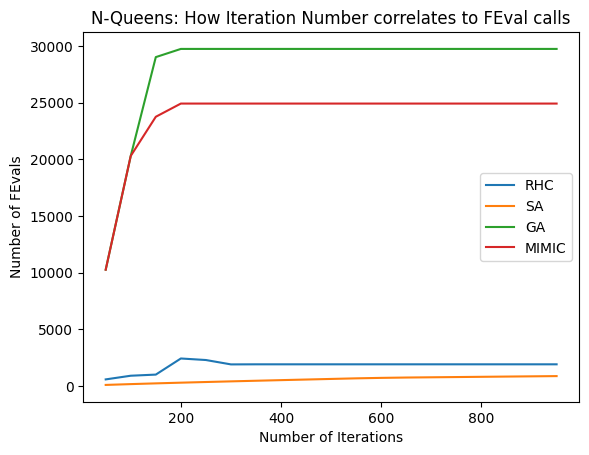

In [11]:
"""
Plotting the FEvals (Y axis) to iteration size (X axis) for Four-Peaks
"""

plt.plot(iteration_sizes, rhc_data_fevals, label = 'RHC')
plt.plot(iteration_sizes, sa_data_fevals, label = 'SA')
plt.plot(iteration_sizes, ga_data_fevals, label = 'GA')
plt.plot(iteration_sizes, mimic_data_fevals, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Number of FEvals")
plt.title("N-Queens: How Iteration Number correlates to FEval calls")
plt.legend()
plt.show()

# Comparing the Wall Clock Times based off Iteration Number

In [12]:
"""
Main custom runner for the Four Peaks optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
problem_size = 12

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 200
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 1000, 50)]
iteration_sizes.pop(0)

rhc_data_clock = []
sa_data_clock = []
ga_data_clock = []
mimic_data_clock = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_state = np.random.randint(problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.CustomFitness(queens_max)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = problem_size
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            init_state=initial_state,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(end - start)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(end - start)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC FEvals {rhc_avg}")
    rhc_data_clock.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA FEvals {sa_avg}")
    sa_data_clock.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA FEvals {ga_avg}")
    ga_data_clock.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC FEvals {mimic_avg}")
    mimic_data_clock.append(mimic_avg)
    
    print("====================================================")


Running iteration size 50!
RHC FEvals 0.11880640983581543
SA FEvals 0.006227970123291016
GA FEvals 1.0240334510803222
MIMIC FEvals 1.460663366317749
Running iteration size 100!
RHC FEvals 0.22331671714782714
SA FEvals 0.012029218673706054
GA FEvals 2.0824397087097166
MIMIC FEvals 2.939243268966675
Running iteration size 150!
RHC FEvals 0.32053341865539553
SA FEvals 0.01715240478515625
GA FEvals 2.978848600387573
MIMIC FEvals 3.454603385925293
Running iteration size 200!
RHC FEvals 0.37940540313720705
SA FEvals 0.022989940643310548
GA FEvals 3.070703887939453
MIMIC FEvals 3.6249571800231934
Running iteration size 250!
RHC FEvals 0.4066826820373535
SA FEvals 0.027602291107177733
GA FEvals 3.0973831176757813
MIMIC FEvals 3.6593244075775146
Running iteration size 300!
RHC FEvals 0.4208033561706543
SA FEvals 0.0328862190246582
GA FEvals 3.100544309616089
MIMIC FEvals 3.658753442764282
Running iteration size 350!
RHC FEvals 0.41942248344421384
SA FEvals 0.037306594848632815
GA FEvals 3.10593

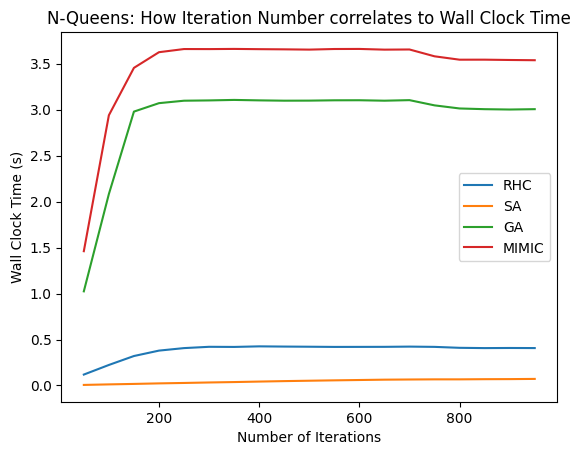

In [13]:
"""
Plotting the Wall Clock time (Y axis) to iteration size (X axis) for N-Queens
"""

plt.plot(iteration_sizes, rhc_data_clock, label = 'RHC')
plt.plot(iteration_sizes, sa_data_clock, label = 'SA')
plt.plot(iteration_sizes, ga_data_clock, label = 'GA')
plt.plot(iteration_sizes, mimic_data_clock, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Wall Clock Time (s)")
plt.title("N-Queens: How Iteration Number correlates to Wall Clock Time")
plt.legend()
plt.show()